In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import torchvision

In [37]:
print("Device Name:", torch.cuda.get_device_name(0))
print("Current Device:", torch.cuda.current_device())

Device Name: NVIDIA GeForce RTX 2050
Current Device: 0


In [38]:
torch.cuda.memory_allocated()

42952704

In [2]:
transform = torchvision.transforms.ToTensor()

In [3]:
train_dataset = torchvision.datasets.MNIST(root = './data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root = './data', train=False, download=True, transform=transform)

In [4]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True, num_workers=4)

In [7]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.network = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16 * 28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.Softmax()
        )

    def forward(self, x):
        return self.network(x)

## nn.Conv2d means

`nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)`

- This line creates a convolutional layer that:

1. Takes a 1x28x28 grayscale image as input. (n_channel=1)
2. Applies 16 3x3 filters to extract features, producing 16 feature maps of size 28x28. (out_channels=16, kernel_size=3)
3. A stride of 1 means the filter moves 1 pixel at a time. (stride=1)
4. For a 3x3 kernel, padding of 1 keeps the output size the same as the input size. (padding=1)
Retains the input dimensions using padding.

- The output size of the feature map can be calculated using this formula:

#### Output Size = [{(Input Size) + 2(Padding) - (Kernel Size)} / (Stride)] + 1

- For a 28x28 MNIST image:

#### Output Size = [{(28) + 2*1 - 3} / 1] + 1 = 28

- Thus, the output feature map size will be 28x28 with 16 channels (from out_channels).

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [9]:
model = SimpleCNN().to(device)

In [10]:
model

SimpleCNN(
  (network): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=12544, out_features=128, bias=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=10, bias=True)
    (8): Softmax(dim=None)
  )
)

In [41]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [11]:
loss_fc = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [12]:
# train_ten = torch.from_numpy(train_loader).type(torch.float)
# test_ten = torch.from_numpy(test_loader).type(torch.long)

In [13]:
for features, label in train_loader:
    print(features.shape)  # Shape of input features
    break

torch.Size([64, 1, 28, 28])


In [14]:
for features, label in train_loader:
    features = features.view(features.size(0), -1)
    print(features.shape)  # Should be [32, 784]
    break

torch.Size([64, 784])


In [15]:
import time

start_time = time.time()

torch.manual_seed(43)
epochs = 5

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for features , label in train_loader:
        features, label = features.to(device), label.to(device)

        optimizer.zero_grad()
        outputs = model(features).view(features.size(0), -1)
        loss = loss_fc(outputs, label)
        loss.backward()
        optimizer.step()

        running_loss = running_loss + loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time is {total_time / 60} Minutes!")

C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch [1/5], Loss: 1.6015
Epoch [2/5], Loss: 1.4901
Epoch [3/5], Loss: 1.4816
Epoch [4/5], Loss: 1.4770
Epoch [5/5], Loss: 1.4744
Total training time is 2.5645682334899904 Minutes!


In [16]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for feature, labels in test_loader:
        feature, labels = feature.to(device), labels.to(device)
        outputs = model(feature)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on MNIST test set: {100 * correct / total:.2f}%')

Accuracy on MNIST test set: 98.54%


In [17]:
import cv2

In [18]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [19]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [20]:
train_dataset.data[1]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [21]:
train_dataset.data[1].shape

torch.Size([28, 28])

In [22]:
import matplotlib.pyplot as plt

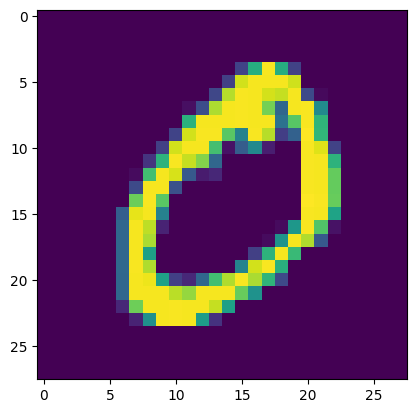

In [23]:
plt.imshow(train_dataset.data[1])
plt.show()

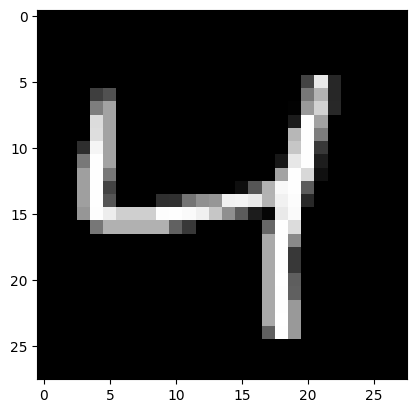

In [24]:
plt.imshow(train_dataset.data[2], cmap="gray")
plt.show()

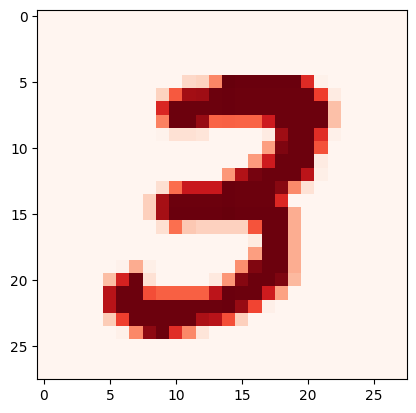

In [25]:
plt.imshow(train_dataset.data[7], cmap="Reds")
plt.show()

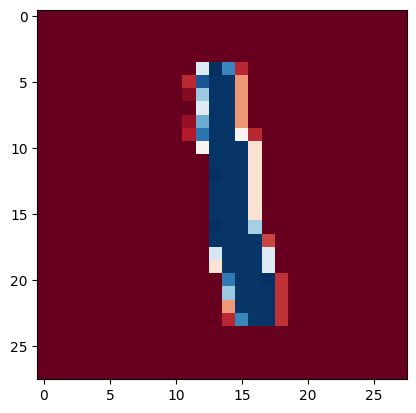

In [26]:
plt.imshow(train_dataset.data[6], cmap="RdBu")
plt.show()

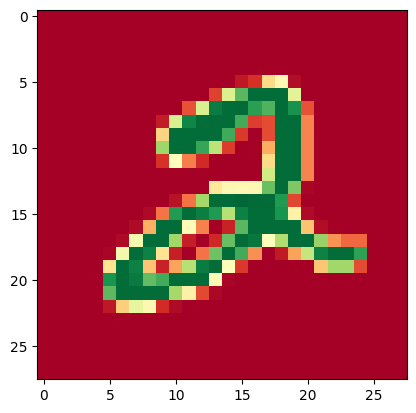

In [27]:
plt.imshow(train_dataset.data[5], cmap="RdYlGn")
plt.show()

In [28]:
test_dataset.targets[:20]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

In [29]:
train_dataset.data[1]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [30]:
class_names = train_dataset.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [31]:
image, label = train_dataset[2]

In [32]:
label

4

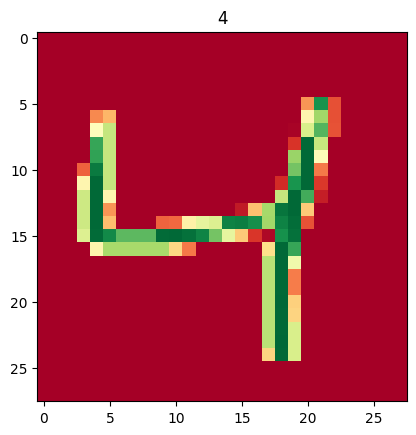

In [33]:
image, label = train_dataset[2]
plt.imshow(image.squeeze(), cmap="RdYlGn")
plt.title(label)
plt.show()

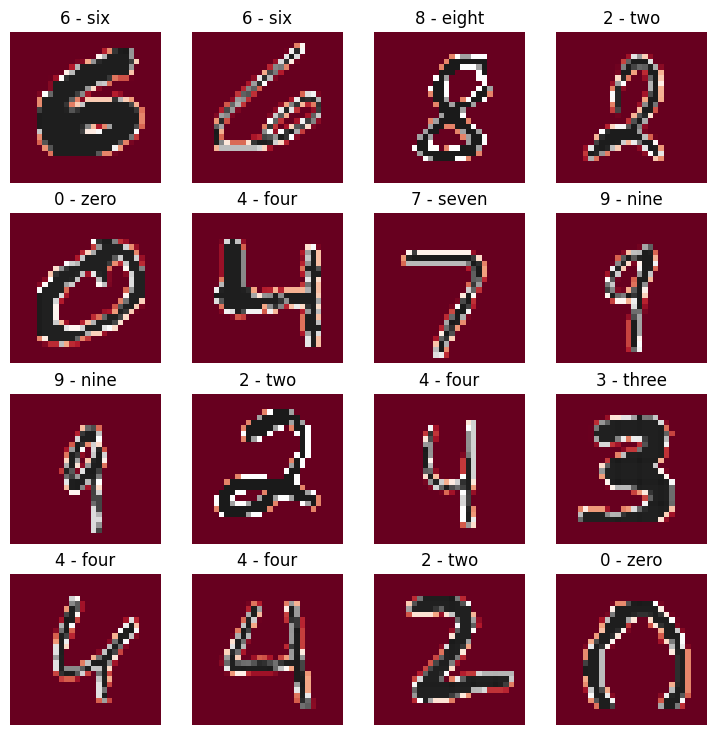

In [34]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    img, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="RdGy")
    plt.title(class_names[label])
    plt.axis(False);

In [35]:
image_path = 'two.png'  # Path to your input image
# input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

In [36]:
from PIL import Image
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Define preprocessing: Resize, Normalize, and Convert to Tensor
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((28, 28)),       # Resize to 28x28 pixels
    torchvision.transforms.ToTensor(),             # Convert to Tensor
    torchvision.transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] range
])

input_tensor = transform(image)  # Apply the transformation
input_tensor = input_tensor.unsqueeze(0)  # Add batch dimension (1, 1, 28, 28)

In [105]:
with torch.no_grad():  # Disable gradient computation for inference
    output = model(input_tensor)  # Forward pass
    predicted_class = torch.argmax(output, dim=1).item()  # Get the predicted class

print(f"Predicted Digit: {predicted_class}")

Predicted Digit: 7


C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [127]:
image_path = 'three.png'

image = Image.open(image_path).convert('L')  # Convert to grayscale

# Define preprocessing: Resize, Normalize, and Convert to Tensor
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((28, 28)),       # Resize to 28x28 pixels
    torchvision.transforms.ToTensor(),             # Convert to Tensor
    torchvision.transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] range
])

input_tensor = transform(image)  # Apply the transformation
input_tensor = input_tensor.unsqueeze(0)  # Add batch dimension (1, 1, 28, 28)

with torch.no_grad():  # Disable gradient computation for inference
    output = model(input_tensor)  # Forward pass
    predicted_class = torch.argmax(output, dim=1).item()  # Get the predicted class

print(f"Predicted Digit: {predicted_class}")

Predicted Digit: 1


In [128]:
output

tensor([[5.4713e-09, 8.7141e-01, 2.1954e-04, 8.3374e-04, 5.4606e-09, 1.2712e-01,
         5.7192e-08, 4.2242e-04, 5.0367e-11, 3.7383e-08]])

In [111]:
input_tensor

tensor([[[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -0.9922, -0.9922, -0.9922, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -0.9843, -0.7569, -0.6863, -0.7255, -0.9608,
           -1.0000, -1.0000, -1.000

In [137]:
image_path = 'two.png'

image = Image.open(image_path).convert('L')  # Convert to grayscale

# Define preprocessing: Resize, Normalize, and Convert to Tensor
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((28, 28)),       # Resize to 28x28 pixels
    torchvision.transforms.ToTensor(),             # Convert to Tensor
    torchvision.transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] range
])

input_tensor = transform(image)  # Apply the transformation
input_tensor = input_tensor.unsqueeze(0)  # Add batch dimension (1, 1, 28, 28)
# Scale to the range [0, 1]
scaled_tensor = (input_tensor + 1) / 2

with torch.no_grad():  # Disable gradient computation for inference
    model.eval()
    output = model(scaled_tensor)  # Forward pass
    # probabilities = torch.softmax(output, dim=1)
    predicted_class = torch.argmax(output, dim=1).item()  # Get the predicted class

    confidence = torch.max(probabilities, dim=1).values

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence.item():.2f}")

Predicted class: 7
Confidence: 0.23


In [138]:
output

tensor([[5.2146e-21, 9.1898e-19, 2.0398e-14, 3.2859e-10, 4.2665e-19, 4.6571e-19,
         1.3853e-21, 1.0000e+00, 3.4266e-19, 1.0452e-06]])

In [133]:
input_tensor

tensor([[[[ 0.8588,  0.8196,  0.8588,  0.8275,  0.8667,  0.8667,  0.8745,
            0.9373,  0.8667,  0.8745,  0.9059,  0.9608,  0.9137,  0.8745,
            1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
            1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
          [ 0.8196,  0.6941,  0.6000,  0.6314,  0.6863,  0.6078,  0.6941,
            0.8196,  0.6235,  0.6549,  0.6627,  0.8275,  0.8039,  0.7647,
            1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
            1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
          [ 0.9922,  0.9843,  0.9765,  0.9765,  0.9765,  0.9765,  0.9843,
            0.9843,  0.9765,  0.9765,  0.9765,  0.9922,  0.9922,  0.9843,
            1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
            1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9922,  0.9059,  0.8745,  0.8039,  0.7961,  0.7961,
            0.7961,  0.7961,  0.796

In [117]:
input_tensor.shape

torch.Size([1, 1, 28, 28])